## Download MNIST Datasset from Kaggle

In [1]:
!pip install -q kaggle
!pip install --upgrade --force-reinstall --no-deps kaggle
from google.colab import files
files.upload()

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

## download dataset 
!kaggle competitions download -c digit-recognizer

## unzip downloaded dataset
!unzip /content/digit-recognizer.zip -d 'data'

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sharmilapolamuri","key":"e4f89438c4a7a4fc5630cb210de7a196"}'}

## Importing necessary libraries

In [7]:
import os
import pandas as pd 
import numpy as np

from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, GRU, Bidirectional, GlobalMaxPooling1D, Lambda, Concatenate, Dense
import tensorflow.keras.backend as k
import matplotlib.pyplot as plt
 

## Load dataset

In [33]:
def get_mnist():
  train_data = pd.read_csv('/content/data/train.csv')
  print("Data loading")
  print(type(train_data))
  train_data = train_data.values
  # np.random.shuffle(train_data)
  X = train_data[:, 1:].reshape(-1, 28, 28) / 255.0
  y = train_data[:, 0]

  return X, y

In [34]:
X, y = get_mnist()

Data loading
<class 'pandas.core.frame.DataFrame'>


In [35]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [37]:
## configuration values
D = 28
M = 15

## Model Building

In [38]:
input_layer = Input(shape=(D,D))

## up to down 
rnn1 = Bidirectional(LSTM(units=M, return_sequences=True))
hidden_layer_1 = rnn1(input_layer)
hidden_layer_1 = GlobalMaxPooling1D()(hidden_layer_1)

## left to right
rnn2 = Bidirectional(LSTM(units=M, return_sequences=True))

## custom layer 
permutor = Lambda(lambda t: k.permute_dimensions(t, pattern=(0,2,1)))

hidden_layer_2 = permutor(input_layer)
hidden_layer_2 = rnn2(hidden_layer_2)
hidden_layer_2 = GlobalMaxPooling1D()(hidden_layer_2)

## concatenate both layers of rnn1 and rnn2
concatenator = Concatenate(axis=1)
final_layer = concatenator([hidden_layer_1, hidden_layer_2])

## final output layer
output_layer = Dense(10, activation='softmax')(final_layer)

## initialize model
model = Model(inputs= input_layer, outputs=output_layer)

In [39]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 28, 28)       0           input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional (Bidirectional)   (None, 28, 30)       5280        input_1[0][0]                    
__________________________________________________________________________________________________
bidirectional_1 (Bidirectional) (None, 28, 30)       5280        lambda[0][0]                     
______________________________________________________________________________________________

In [40]:
## model compilation
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [41]:
## train model
training_history = model.fit(X, y, batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
1050/1050 [==============================] - 27s 20ms/step - loss: 1.2652 - accuracy: 0.6507 - val_loss: 0.2940 - val_accuracy: 0.9200
Epoch 2/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.2576 - accuracy: 0.9293 - val_loss: 0.1931 - val_accuracy: 0.9437
Epoch 3/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.1755 - accuracy: 0.9477 - val_loss: 0.1513 - val_accuracy: 0.9564
Epoch 4/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.1422 - accuracy: 0.9571 - val_loss: 0.1321 - val_accuracy: 0.9605
Epoch 5/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.1181 - accuracy: 0.9650 - val_loss: 0.1184 - val_accuracy: 0.9654
Epoch 6/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.1013 - accuracy: 0.9687 - val_loss: 0.1034 - val_accuracy: 0.9682
Epoch 7/10
1050/1050 [==============================] - 20s 19ms/step - loss: 0.0866 - accuracy: 0.9737 - val_loss: 0.1023 -

## Plot loss and accuracies

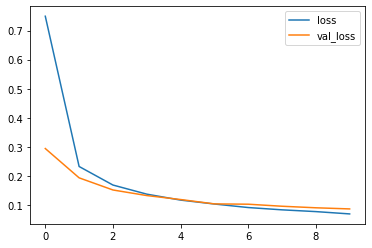

In [42]:
plt.plot(training_history.history['loss'], label='loss')
plt.plot(training_history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

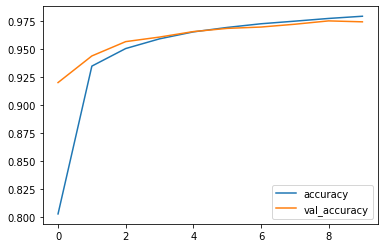

In [43]:
plt.plot(training_history.history['accuracy'], label='accuracy')
plt.plot(training_history.history['val_accuracy'], label='val_accuracy')
plt.legend()
plt.show()